In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

basepath = os.path.dirname(os.path.abspath('__file__'))
datapath = basepath + '/data/hugh-murray/'
readfile1 = 'chapter1/chapter1-processed.csv'
readfile2 = 'chapter2/chapter2-processed.csv'
readfile3 = 'chapter3/chapter3-processed.csv'
#readfile_total = 'total/index.csv'

df1 = pd.read_csv(datapath + readfile1,sep='\t',encoding='ISO-8859-1')
df2 = pd.read_csv(datapath + readfile2,sep='\t',encoding='ISO-8859-1')
df3 = pd.read_csv(datapath + readfile3,sep='\t',encoding='ISO-8859-1')
#df_total = pd.read_csv(datapath + readfile_total,encoding='ISO-8859-1')


df1.head(10)


,chapterNo,chapterTitle,sectionNo,sectionTitle,sentence,sentence_cleaned
0,1,PART 1,1,Power and Magnificence of Kublai,Now I am to give you a wonderful account of th...,give wonderful account greatest king tartars s...
1,1,PART 1,1,Power and Magnificence of Kublai,"That name is assuredly well merited, since he ...",name assuredly well merited since powerful peo...
2,1,PART 1,1,Power and Magnificence of Kublai,Whosoever descends in the direct line from Gen...,whosoever descends direct line gengis entitled...
3,1,PART 1,1,Power and Magnificence of Kublai,He began to reign in the year of our Lord 1256...,began reign year lord 1256and maintained domin...
4,1,PART 1,1,Power and Magnificence of Kublai,"His brothers sought to oppose his succession, ...",brothers sought oppose succession bravery righ...
5,1,PART 1,1,Power and Magnificence of Kublai,"t From the beginning of his reign, forty-two y...",beginning reign fortytwo years elapsed present...
6,1,PART 1,1,Power and Magnificence of Kublai,"He is now full eighty-five years old, and befo...",full eightyfive years old accession commanded ...
7,1,PART 1,1,Power and Magnificence of Kublai,But since that time he has joined the army onl...,since time joined army year 1286 tell occasion
8,1,PART 1,10,His magnificent Palace in Kambalu,"He resides in the vast city of Kambalu, three ...",resides vast city kambalu three months year de...
9,1,PART 1,10,His magnificent Palace in Kambalu,"It is a complete square, a mile long on every ...",complete square mile long every side whole fou...


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None,n_gram=None):
    vec = CountVectorizer(ngram_range=(n_gram,n_gram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def show_plot(common_words):
    df1 = pd.DataFrame(common_words, columns = ['cleanedText' , 'count'])
    df1.groupby('cleanedText').sum()['count'].sort_values(ascending=False).plot.bar()
    plt.show()
    
common_words_one_gram = get_top_n_words(df1['sentence_cleaned'], 20,1)
show_plot(common_words_one_gram)

common_words_bi_gram = get_top_n_words(df['sentence_cleaned'], 20,2)
show_plot(common_words_bi_gram)

common_words_tri_gram = get_top_n_words(df['sentence_cleaned'], 20,3)
show_plot(common_words_tri_gram)

#for word, freq in common_words:
#    print(word, freq)




NameError: name 'df' is not defined

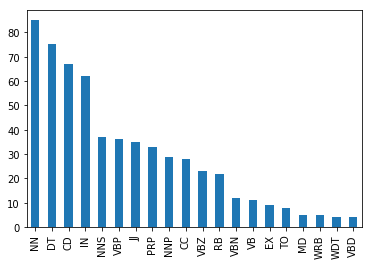

In [42]:
from textblob import TextBlob

blob = TextBlob(str(df['sentence']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot.bar()
plt.show()


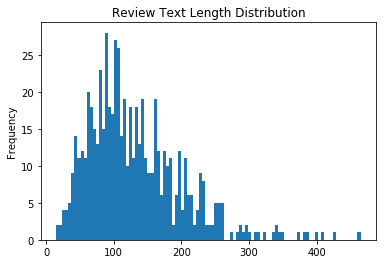

In [58]:
df['review_len'] = df['sentence'].astype(str).apply(len)
df['word_count'] = df['sentence'].apply(lambda x: len(str(x).split()))

df['review_len'].plot(
    kind='hist',
    bins=100,
    x='review length',
    y='count',
    title='Review Text Length Distribution')

df['word_count'].plot(
    kind='hist',
    bins=100,
    x='review length',
    y='count',
    title='Review Text Length Distribution')